In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

## read and describe the metadata

In [43]:
fpn_csv = 'cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [44]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [45]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


In [46]:
#transforming data types from string / bool to int for Kmeans
# data['art_movement'] = data['art_movement'].str.len().replace(np.nan, 0)
import numpy
rep = numpy.multiply(data['representation'],1)
# print(data['representation'])
print(rep)
data['representation_semi'] = numpy.multiply(data['representation_semi'],1).replace(np.nan, 0)
data['representation'] = numpy.multiply(data['representation'],1).replace(np.nan, 0)
data['spatial_dimension2'] = numpy.multiply(data['spatial_dimension2'],1).replace(np.nan, 0)
print(data['spatial_dimension2'])

0      1
1      1
2      1
3      0
4      0
      ..
399    0
400    0
401    1
402    0
403    0
Name: representation, Length: 404, dtype: int64
0      0
1      0
2      0
3      1
4      0
      ..
399    0
400    0
401    0
402    0
403    0
Name: spatial_dimension2, Length: 404, dtype: int64


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [47]:
X = data[['art_movement', 'ar','co','te', 'sh','or']]
# Y = data[['representation', 'art_movement','si','te', 'sh','or']]
# Z = data[[ 'art_movement','si','te','co','ar']]


# I preferred the clusters that were formed from the first list of chosen features, they made more sense to me

In [48]:
X.head()
# Y.head()
# Z.head()

,art_movement,ar,co,te,sh,or
0,10.0,5,0,0,3,4
1,11.0,5,0,3,2,3
2,9.0,5,4,4,4,2
3,11.0,5,0,2,4,2
4,11.0,5,1,4,4,0


# KMeans

In [49]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

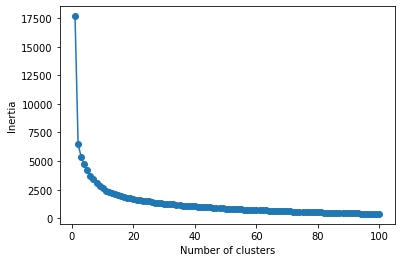

In [51]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [63]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [6, 8, 10, 11, 15]
# range_n_clusters = [7, 9, 12, 14, 17]

For n_clusters = 6 The average silhouette_score is : 0.300669968355756


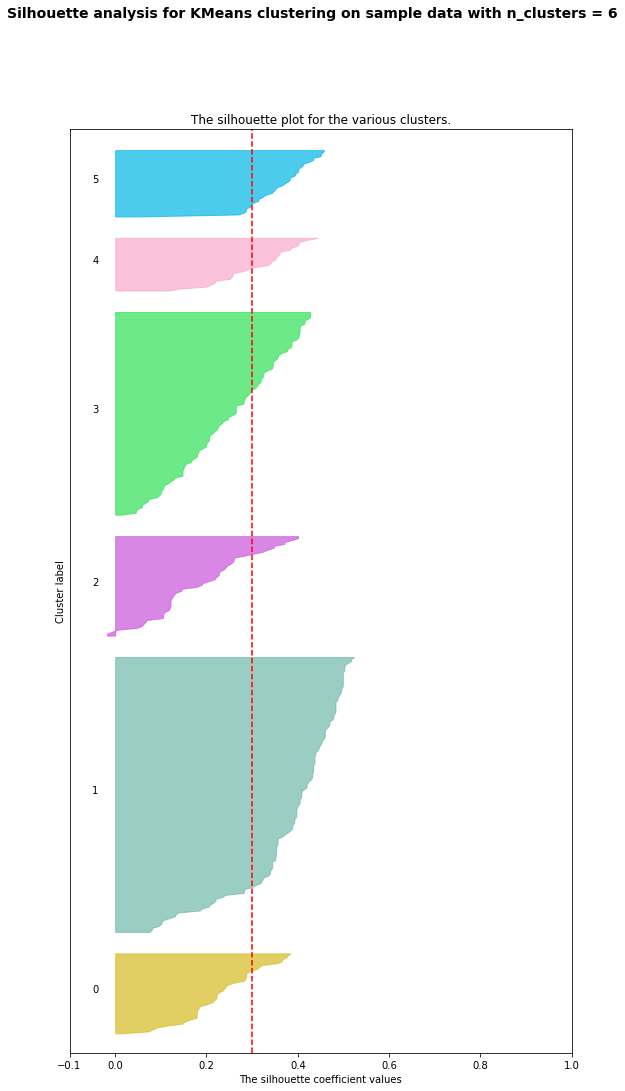

For n_clusters = 8 The average silhouette_score is : 0.26837070820481224


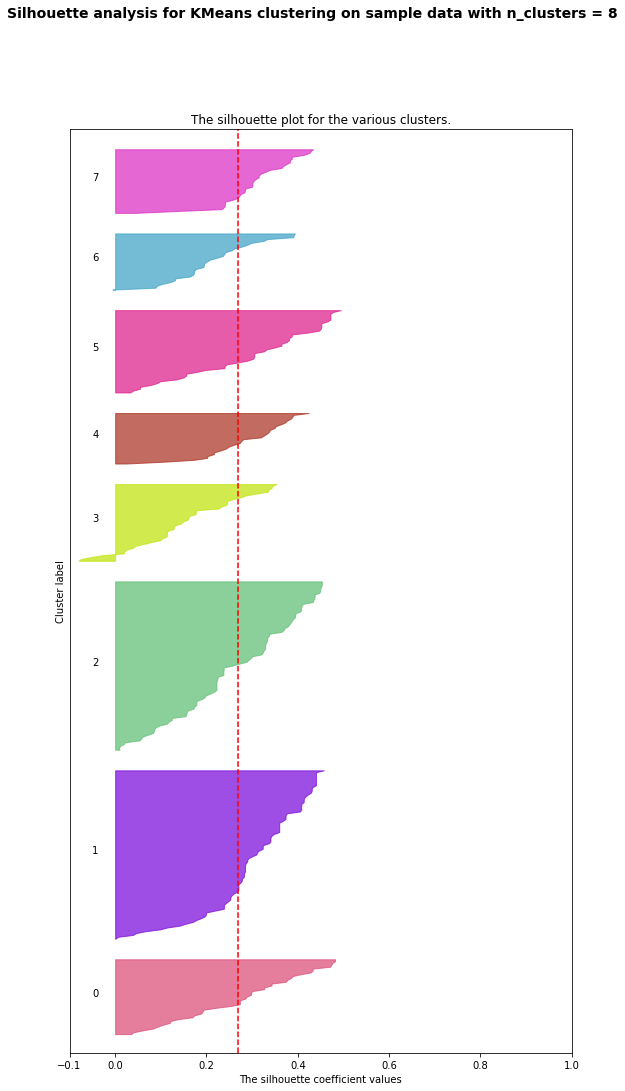

For n_clusters = 10 The average silhouette_score is : 0.27198261395046086


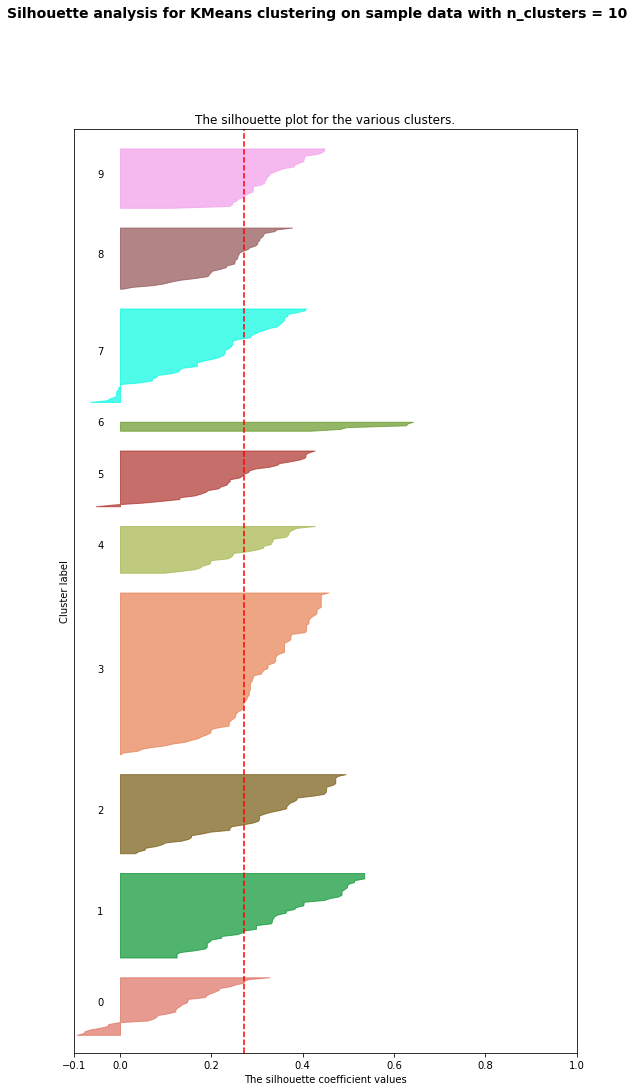

For n_clusters = 11 The average silhouette_score is : 0.26864147766919616


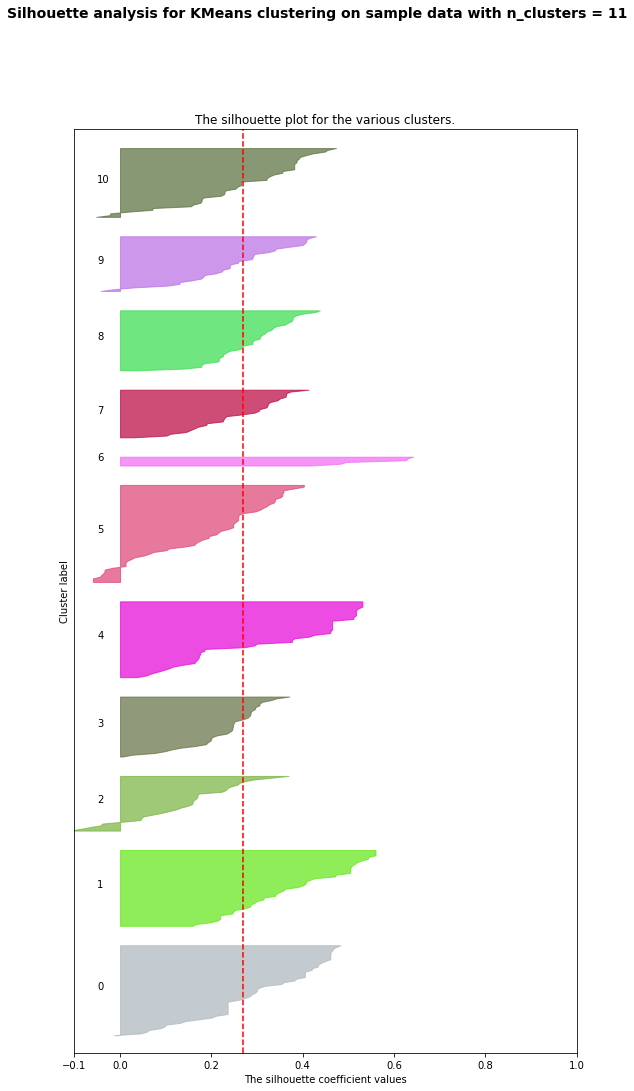

For n_clusters = 15 The average silhouette_score is : 0.26503057185283135


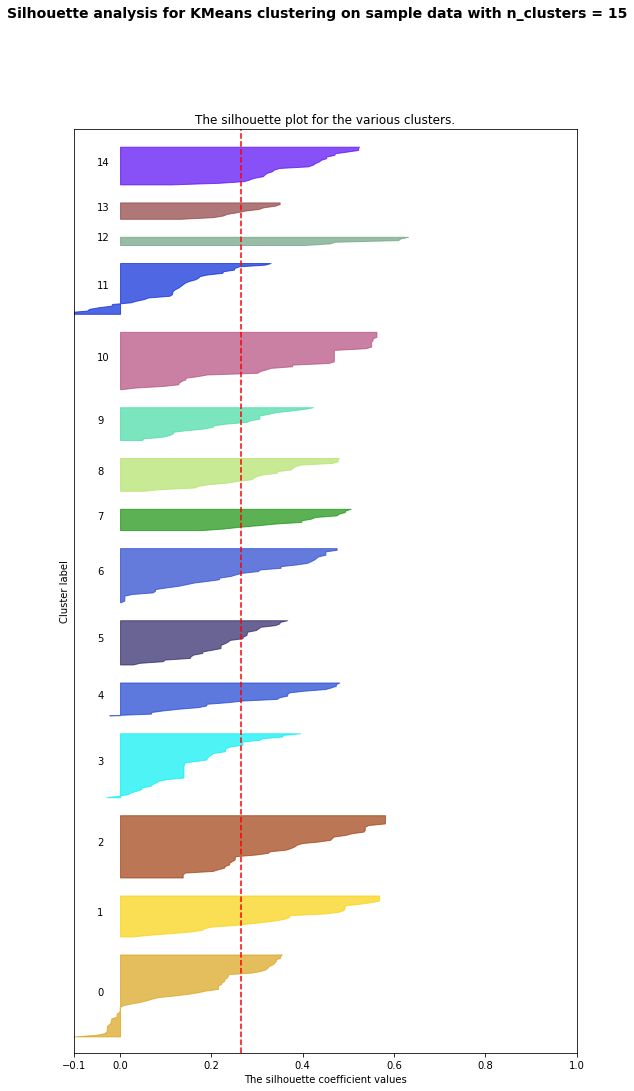

In [64]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

Based on the highest average silhouette score, I have chosen to go with 6 clusters

In [69]:
# set the number of clusters in the final model
my_n_clusters = 8

In [70]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [71]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
3_small.jpg
4_small.jpg
6_small.jpg
9_small.jpg
11_small.jpg
13_small.jpg
15_small.jpg
16_small.jpg
17_small.jpg
23_small.jpg
25_small.jpg
27_small.jpg
29_small.jpg
36_small.jpg
39_small.jpg
41_small.jpg
45_small.jpg
46_small.jpg
49_small.jpg
72_small.jpg
76_small.jpg
84_small.jpg
88_small.jpg
93_small.jpg
94_small.jpg
95_small.jpg
104_small.jpg
107_small.jpg
108_small.jpg
110_small.jpg
114_small.jpg
115_small.jpg
119_small.jpg
122_small.jpg
135_small.jpg
166_small.jpg
167_small.jpg
169_small.jpg
172_small.jpg
175_small.jpg
182_small.jpg
187_small.jpg
194_small.jpg
197_small.jpg
199_small.jpg
200_small.jpg
204_small.jpg
206_small.jpg
254_small.jpg
255_small.jpg
256_small.jpg
265_small.jpg
268_small.jpg
270_small.jpg
274_small.jpg
280_small.jpg
282_small.jpg
283_small.jpg
315_small.jpg
318_small.jpg
348_small.jpg
366_small.jpg
384_small.jpg
405

In [ ]:
# iptsetpref('ImshowBorder','tight')
impath = '/Users/zinabazarbashi/Downloads/ml/ML_assignment_3/option_2/img_small/'
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            # print(str(j+2) + '_small.jpg')
            img = Image.open(impath + str(j+2) + '_small.jpg')
            imgplot = plt.imshow(img)
#             plt.show()/img_small/
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            # print(str(j+2) + '_small.jpg')
            img = Image.open(impath + str(j+2) + '_small.jpg')
            imgplot = plt.imshow(img)
            plt.show()